In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Alle data staan online beschikbaar, dus ik lees ze hieronder in:

In [2]:
url_confirmed = 'https://epistat.sciensano.be/Data/COVID19BE_CASES_AGESEX.csv'
url_tested = 'https://epistat.sciensano.be/Data/COVID19BE_tests.csv'
confirmed = pd.read_csv(url_confirmed, parse_dates=['DATE'])
tested = pd.read_csv(url_tested, parse_dates=['DATE'])

In [3]:
confirmed.head()

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,M,1
2,2020-03-01,Brussels,Brussels,10-19,F,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1


In [4]:
tested.head()

,DATE,PROVINCE,TESTS_ALL
0,2020-03-01,NaN,1
1,2020-03-01,Antwerpen,18
2,2020-03-01,BrabantWallon,8
3,2020-03-01,Brussels,4
4,2020-03-01,Hainaut,5


We tellen alle gevallen op per dag:

In [5]:
daily_confirmed = confirmed.groupby('DATE').sum().reset_index()
daily_tested = tested.groupby('DATE').sum().reset_index()
daily_data = pd.merge(daily_confirmed, daily_tested, on='DATE')

We smijten de laatste 2 dagen uit de data, want mogelijks zijn deze data nog niet volledig.    
We berekenen aantal bevestigde gevallen per testen. Noot hierbij: indien eenzelfde persoon 2 keer wordt getest, dan worden beide testen hierin geteld, want Sciensano geeft niet aan in de data welke testen samenhoren. Dus, in werkelijkheid is het aantal testen, in de noemer, lager, dus het aantal bevestigde gevallen per 1000 hoger.   
Hiervan nemen we een gemiddelde over 7 dagen, om dagelijkse ruis (en bvb onderraportering in het weekend) weg te werken.

In [6]:
daily_data = daily_data.iloc[:-2].copy()
daily_data['cases_per_1000tests'] = daily_data.CASES/daily_data.TESTS_ALL*1000
daily_data['cases_per_1000tests_mov_win'] = daily_data.cases_per_1000tests.rolling(window=7, center=True).mean()
daily_data['cases_mov_win'] = daily_data.CASES.rolling(window=7, center=True).mean()

Hieronder het aantal bevestigde gevallen per 1000 tests, vanaf het begin van de pandemie. Deze grafiek is echter **niet bruikbaar** om de huidige situatie te vergelijken met maart-april, want toen werden (nagenoeg) enkel gehospitaliseerden getest.

<IPython.core.display.Javascript object>


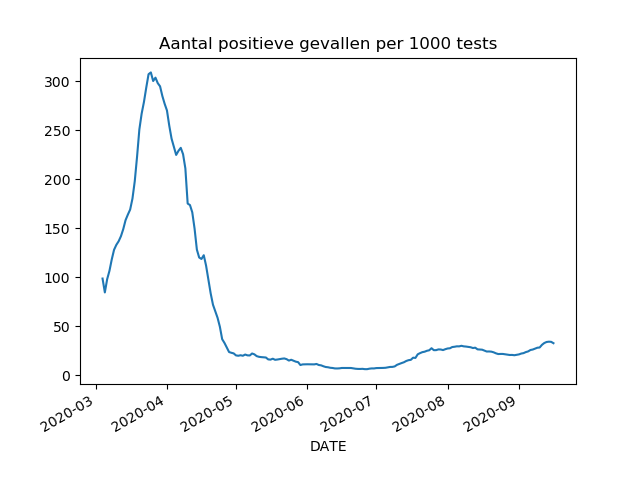

Text(0.5, 1.0, 'Aantal positieve gevallen per 1000 tests')

In [7]:
fig,ax = plt.subplots()
daily_data.plot('DATE', 'cases_per_1000tests_mov_win', ax=ax, legend=None, x_compat=True)
ax.set_title('Aantal positieve gevallen per 1000 tests')

Hieronder dezelfde grafiek, maar enkel vanaf juni en ingezoomd op de y-as. Sinds juni (en zeker juli) is er genoeg testcapaciteit, dus dit kunnen we vergelijken. We zien een sterke stijging in juli, afgevlakt door verstrengde maatregelen, en opnieuw een sterke stijging in september (maar wel al met een hoger beginpunt).   

In [8]:
fig,ax = plt.subplots()
daily_data.plot('DATE', 'cases_per_1000tests_mov_win', ax=ax, x_compat=True, legend=None)
ax.set_xlim('2020-06', '2020-10')
ax.set_ylim(0,50)
ax.set_title('Aantal positieve gevallen per 1000 tests (juni-september)')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Aantal positieve gevallen per 1000 tests (juni-september)')

In [ ]:
# fig,ax1 = plt.subplots()
# daily_data.plot('DATE', 'cases_per_1000tests_mov_win', ax=ax1, x_compat=True, label='cases/tests', c='green')
# ax2 = ax1.twinx()
# daily_data.plot('DATE', 'cases_mov_win', ax=ax2, x_compat=True, label='cases', c='blue')


# ax1.set_xlim('2020-06', '2020-10')
# ax1.set_ylim(0,50)
# ax2.set_ylim(0,1400)
# ax.set_title('Aantal positieve gevallen (juni-september)')